## **Estimación de la satisfacción de clientes de aerolineas**

En el siguiente notebook se analiza y estima la satisfaccion de pasajeros de aerolineas.

Dataset disponible en: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

### **1. Importación de librerias y de los datos**

In [103]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# herramientas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# escalamiento y normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
# imputers
from sklearn.impute import SimpleImputer
# metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
# mejoras
from sklearn.model_selection import GridSearchCV

In [104]:
# datos y conversion a dataframe
# df1 contiene los datos train
df = pd.read_csv('train.csv')
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [105]:
# datos y conversion a dataframe
# df2 contiene los datos test
df2 = pd.read_csv('test.csv')
df2.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Ambos set de datos contienen la misma cantidad de columnas.

### **2. Limpieza de los datos**

En esta sección se busca realizar una limpieza de los datos, como rellenar datos faltantes, igualar tipos de datos y encontrar datos duplicados. El analisis se lleva a cabo en el dataset de train unicamente.

In [106]:
# dataset
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [107]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [108]:
# estadisticas
print("Estadistica descriptiva del dataset")
df.describe()

Estadistica descriptiva del dataset


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [109]:
# tipos de datos
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

Se verifican los valores unicos en las columnas del tipo object.

In [110]:
# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

# identificar sus valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'Gender': ['Male' 'Female']
Columna 'Customer Type': ['Loyal Customer' 'disloyal Customer']
Columna 'Type of Travel': ['Personal Travel' 'Business travel']
Columna 'Class': ['Eco Plus' 'Business' 'Eco']
Columna 'satisfaction': ['neutral or dissatisfied' 'satisfied']


Para evitar inconsistencias, las variables categoricas se convierten a minusculas.

In [111]:
# convertir a minúsculas
for column in object_columns.columns:
    df[column] = df[column].str.lower()
    # unicos
    unique_values = df[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'Gender': ['male' 'female']
Columna 'Customer Type': ['loyal customer' 'disloyal customer']
Columna 'Type of Travel': ['personal travel' 'business travel']
Columna 'Class': ['eco plus' 'business' 'eco']
Columna 'satisfaction': ['neutral or dissatisfied' 'satisfied']


In [112]:
# convertir a minúsculas
for column in object_columns.columns:
    df2[column] = df2[column].str.lower()
    # unicos
    unique_values = df2[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'Gender': ['female' 'male']
Columna 'Customer Type': ['loyal customer' 'disloyal customer']
Columna 'Type of Travel': ['business travel' 'personal travel']
Columna 'Class': ['eco' 'business' 'eco plus']
Columna 'satisfaction': ['satisfied' 'neutral or dissatisfied']


Se verifican los valores duplicados.

In [113]:
# duplicados
df.duplicated().sum()

0

En esta sección se analiza los valores faltantes en las columnas y se buscan métodos para rellenarlos en caso de ser necesario.

In [114]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Arrival Delay in Minutes,103594,310,0.3
Unnamed: 0,103904,0,0.0
Online boarding,103904,0,0.0
Departure Delay in Minutes,103904,0,0.0
Cleanliness,103904,0,0.0
Inflight service,103904,0,0.0
Checkin service,103904,0,0.0
Baggage handling,103904,0,0.0
Leg room service,103904,0,0.0
On-board service,103904,0,0.0


Se observan datos faltantes en Arrival Delay in Minutes.

In [115]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df2.shape[0]-df2.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df2.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df2.isnull().sum(axis=0)/df2.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Arrival Delay in Minutes,25893,83,0.32
Unnamed: 0,25976,0,0.00
Online boarding,25976,0,0.00
Departure Delay in Minutes,25976,0,0.00
Cleanliness,25976,0,0.00
Inflight service,25976,0,0.00
Checkin service,25976,0,0.00
Baggage handling,25976,0,0.00
Leg room service,25976,0,0.00
On-board service,25976,0,0.00


In [116]:
# verificar nulos
df.loc[df['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,female,loyal customer,38,business travel,eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,male,loyal customer,53,personal travel,eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,male,loyal customer,39,business travel,business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,female,disloyal customer,26,business travel,business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,female,loyal customer,24,personal travel,eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,male,loyal customer,49,personal travel,eco plus,1249,2,5,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,male,loyal customer,58,business travel,eco,733,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,female,disloyal customer,29,business travel,eco,1107,2,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,male,loyal customer,58,business travel,eco,1088,4,4,...,5,1,5,5,5,3,5,0,NaN,satisfied


Se verifica la distribución de los datos.

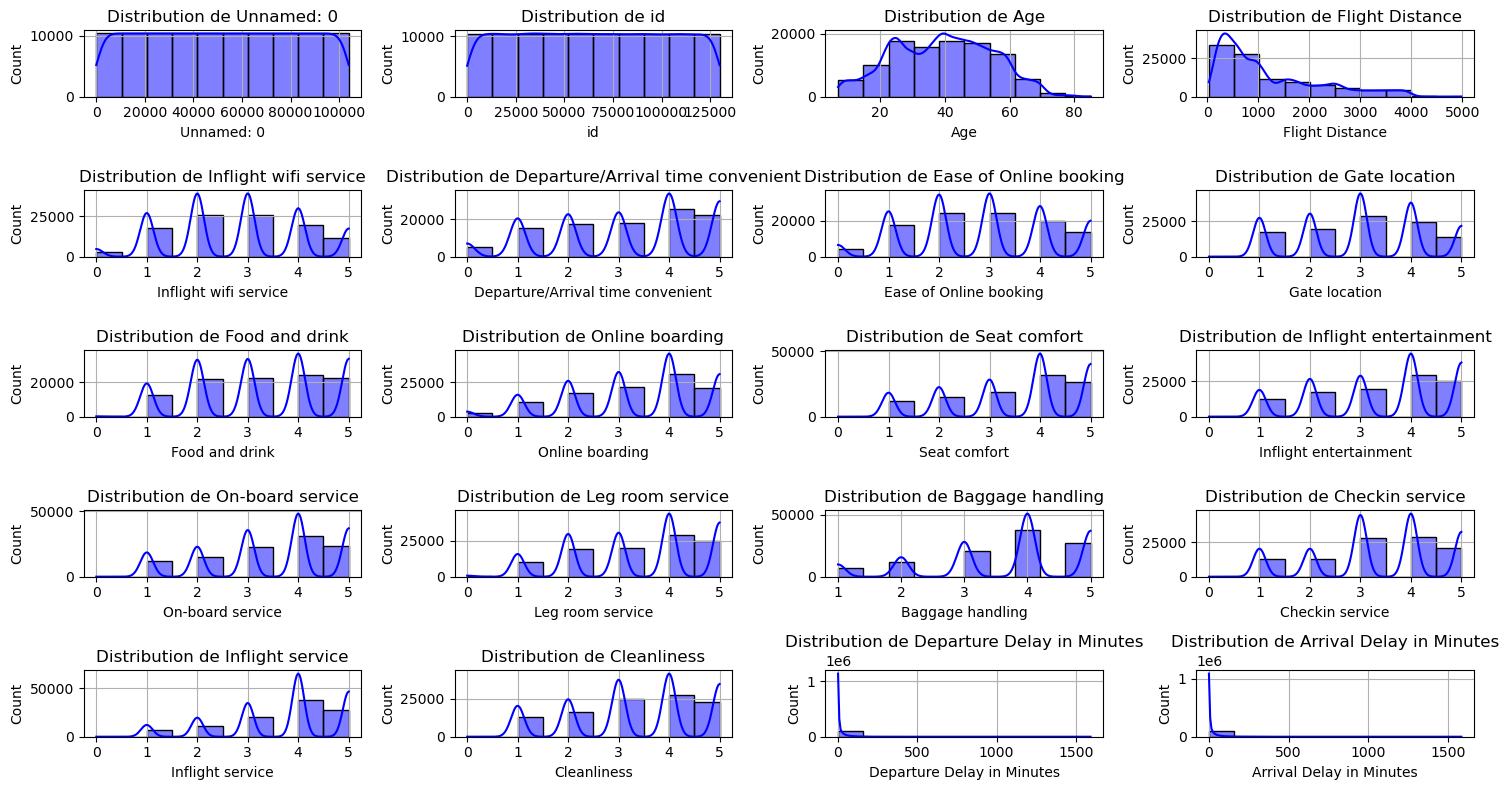

In [117]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()
    plt.grid()

plt.show()

Se visualiza la distribución de outliers.

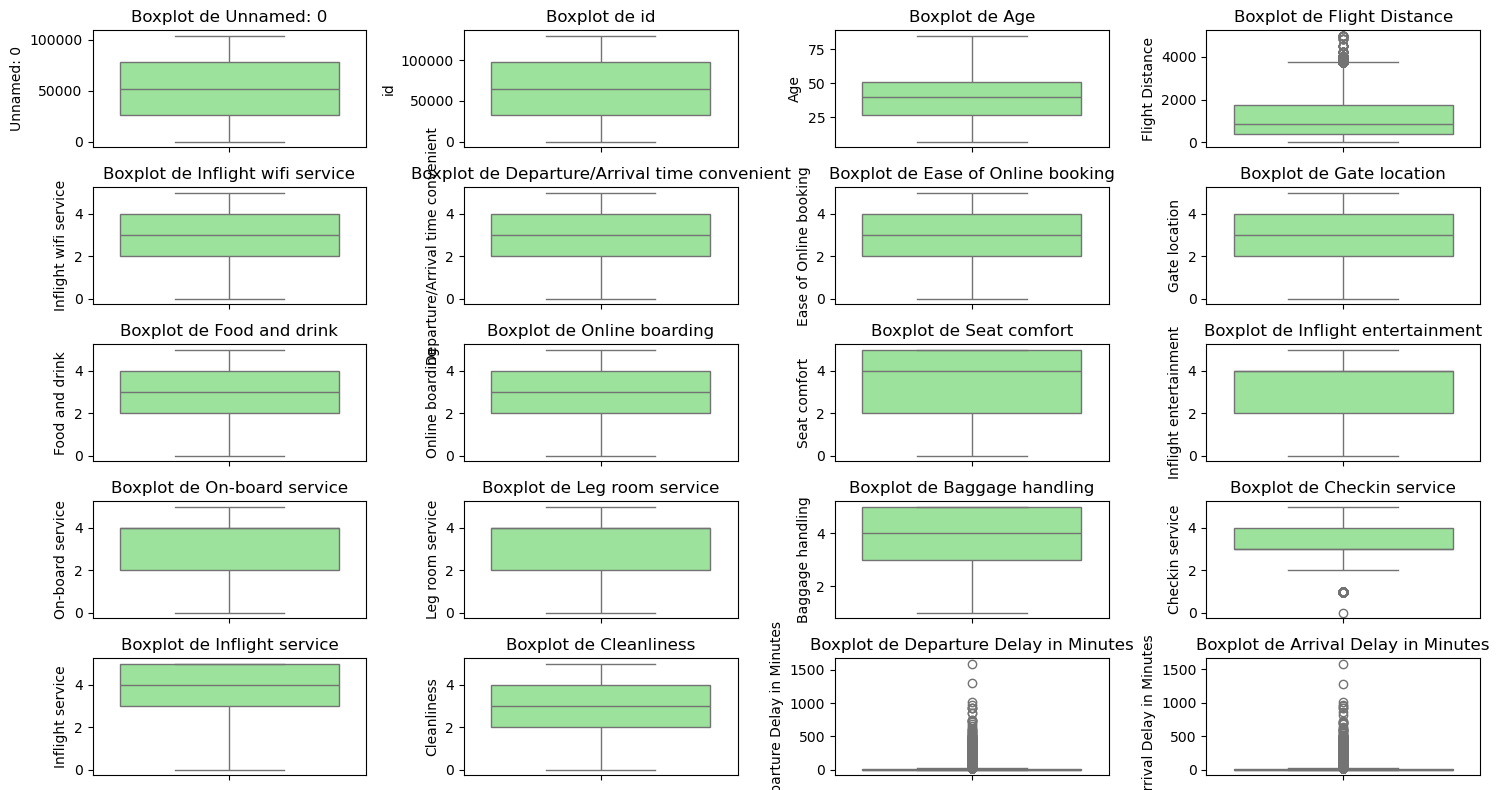

In [118]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Se visualizan outliers en flight distance. Flight distance tiene una distribucion normal sesgada a la derecha, y con outliers.

In [119]:
# estadisticas 
df['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [120]:
# iqr
Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers
outliers = df[(df['Flight Distance'] < lower_bound) | (df['Flight Distance'] > upper_bound)]

print(outliers)

        Unnamed: 0      id  Gender   Customer Type  Age   Type of Travel  \
80              80   73302    male  loyal customer   26  business travel   
173            173  101275    male  loyal customer   52  business travel   
201            201   66800  female  loyal customer   43  business travel   
215            215   23328  female  loyal customer   38  business travel   
379            379   85109    male  loyal customer   46  business travel   
...            ...     ...     ...             ...  ...              ...   
103565      103565   68522  female  loyal customer   59  business travel   
103648      103648   38750    male  loyal customer   43  business travel   
103727      103727   35286  female  loyal customer   25  business travel   
103865      103865   46017    male  loyal customer   35  business travel   
103889      103889  123802  female  loyal customer   43  business travel   

           Class  Flight Distance  Inflight wifi service  \
80      business           

Los datos faltantes son pocos y por tanto se opta por eliminarlos.

In [121]:
# eliminar nulos de arrival Arrival Delay in Minutes
df = df.dropna(subset=['Arrival Delay in Minutes'])

Se visualizan los valores unicos de las columnas categoricas.

In [122]:
# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

# identificar sus valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'Gender': ['male' 'female']
Columna 'Customer Type': ['loyal customer' 'disloyal customer']
Columna 'Type of Travel': ['personal travel' 'business travel']
Columna 'Class': ['eco plus' 'business' 'eco']
Columna 'satisfaction': ['neutral or dissatisfied' 'satisfied']


Las variables del tipo binaria se convierten a este estilo. Por ejemplo, la variable 'satisfaction' se convierte a binario, ya que presenta este comportamiento. Entonces, para 'neutral or dissatisfied':0 y 'satisfied':1

In [123]:
# categoricas binarias a numericas
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied': 1})
df['Gender'] = df['Gender'].map({'male':0, 'female': 1})
df['Type of Travel'] = df['Type of Travel'].map({'personal travel':0, 'business travel': 1})
df['Customer Type'] = df['Customer Type'].map({'disloyal customer':0, 'loyal customer': 1})
df['Class'] = df['Class'].map({'eco': 0, 'eco plus': 1, 'business': 2})

In [124]:
# df
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [125]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Unnamed: 0,103594,0,0.0
Online boarding,103594,0,0.0
Arrival Delay in Minutes,103594,0,0.0
Departure Delay in Minutes,103594,0,0.0
Cleanliness,103594,0,0.0
Inflight service,103594,0,0.0
Checkin service,103594,0,0.0
Baggage handling,103594,0,0.0
Leg room service,103594,0,0.0
On-board service,103594,0,0.0


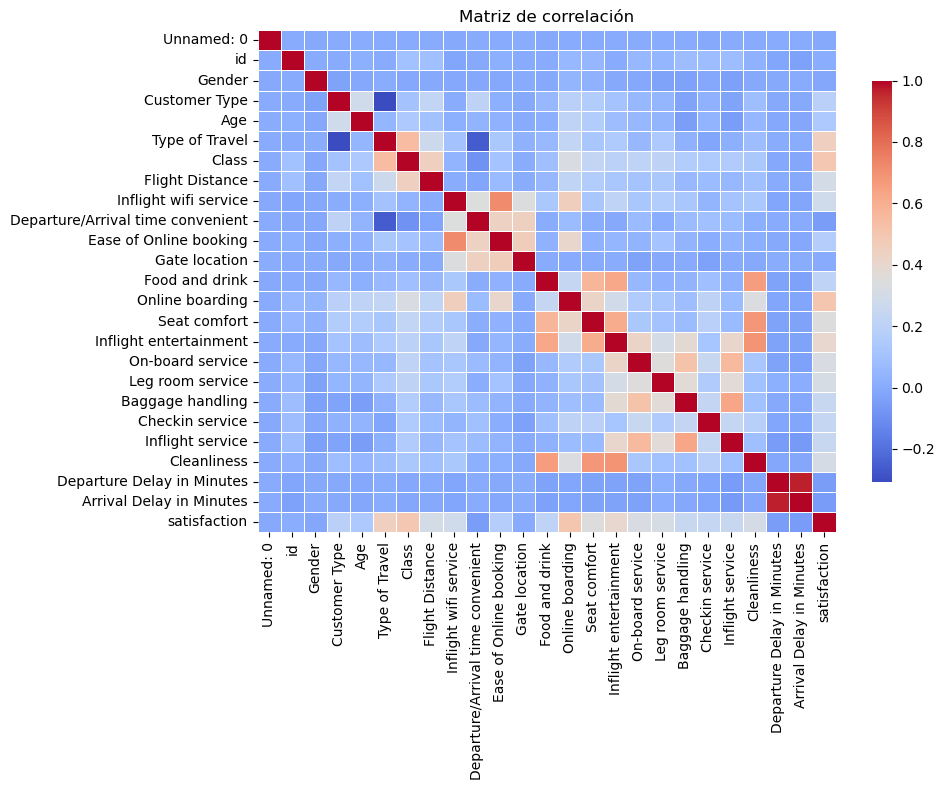

In [126]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

# mostrar el grafico
plt.tight_layout()
plt.show()

En el mapa de calor se observan correlaciones entre las variables, especialmente en aquellas relacionadas al comfort del pasajero.

In [127]:
# df 
df['satisfaction'].unique()

array([0, 1], dtype=int64)

In [128]:
# Contar los valores únicos en la columna 'satisfaction'
conteo = df['satisfaction'].value_counts()

# Mostrar la cantidad de 1 y 0
print(f"Cantidad de 1: {conteo.get(1, 0)}")  # Si no hay 1, devuelve 0.
print(f"Cantidad de 0: {conteo.get(0, 0)}")  # Si no hay 0, devuelve 0.


Cantidad de 1: 44897
Cantidad de 0: 58697


### **3. Preprocesamiento de los datos**

El objetivo de aplicar modelos a este set de datos es el de predecir la satisfaccion del pasajero, por tanto se utilizan metricas de clasificación para la validacion. 

Se realiza el preprocesamiento de los datos para luego ser utilizados en modelos.

In [129]:
#df
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [130]:
# df
df.head(5).T

,0,1,2,3,4
Unnamed: 0,0.0,1.0,2.0,3.0,4.0
id,70172.0,5047.0,110028.0,24026.0,119299.0
Gender,0.0,0.0,1.0,1.0,0.0
Customer Type,1.0,0.0,1.0,1.0,1.0
Age,13.0,25.0,26.0,25.0,61.0
Type of Travel,0.0,1.0,1.0,1.0,1.0
Class,1.0,2.0,2.0,2.0,2.0
Flight Distance,460.0,235.0,1142.0,562.0,214.0
Inflight wifi service,3.0,3.0,2.0,2.0,3.0
Departure/Arrival time convenient,4.0,2.0,2.0,5.0,3.0


La variable target es "satisfaction" y las predictoras son las restantes, a excepción de Unnamed y id, ya que no aportan valor predictivo.

In [131]:
# variables predictoras y target en train
x = df.drop(columns=['Unnamed: 0','id'])
y = df[['satisfaction']]

In [132]:
# verificacion 
print("Variables predictoras dimensiones en train" , x.shape)
print("Variable target dimensiones en train" , y.shape)

Variables predictoras dimensiones en train (103594, 23)
Variable target dimensiones en train (103594, 1)


In [133]:
# extraer columnas numericas
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes    (include=['object']).columns

# verificar
print("Features numericas: ", numerical_features)
print("Features categoricas: ", categorical_features)

Features numericas:  Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Features categoricas:  Index([], dtype='object')


In [134]:
# transformadores para cada subconjunto de columnas
# numerico
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# categorico
categoric_transformer = OneHotEncoder(handle_unknown='ignore')

In [135]:
# crear columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),  
        ('cat', categoric_transformer, categorical_features)  
    ]
)

In [136]:
# split del dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### **4. Aplicación de modelos**

### **Modelo de regresion logistica**

Para predecir la satisfaccion del pasajero se utiliza la regresion logistica.

In [137]:
# pipeline 
model_rlogistic = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression())  
])

In [138]:
# ajustar a los datos de entrenamiento
model_rlogistic.fit(x_train, y_train)

c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [139]:
# realizar predicciones
y_pred = model_rlogistic.predict(x_test)

In [140]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 1.0
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17583
           1       1.00      1.00      1.00     13496

    accuracy                           1.00     31079
   macro avg       1.00      1.00      1.00     31079
weighted avg       1.00      1.00      1.00     31079



In [141]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[17583     0]
 [    0 13496]]


In [142]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

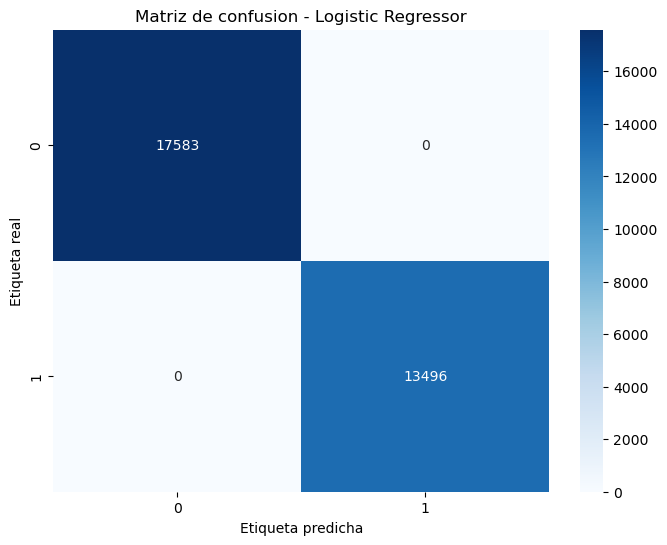

In [143]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Logistic Regressor")

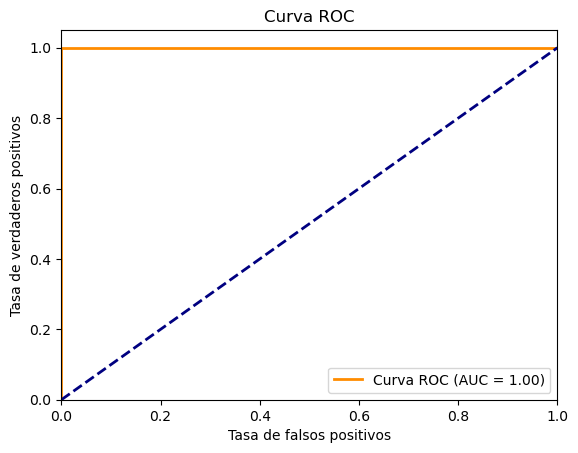

In [144]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_rlogistic.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo de regresion logistica realiza muy bien las clasificaciones, lo cual ya es probablemente una señal de sobreajuste.

### **Modelo KNN para clasificacion**

Para predecir la satisfaccion del pasajero, lo cual ahora es una variable binaria.

In [145]:
# pipeline 
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', KNeighborsClassifier(n_neighbors=3))  
])

In [146]:
# ajustar a los datos de entrenamiento
model_knn.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Onli...'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [147]:
# realizar predicciones
y_pred = model_knn.predict(x_test)

In [148]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 1.0
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17583
           1       1.00      1.00      1.00     13496

    accuracy                           1.00     31079
   macro avg       1.00      1.00      1.00     31079
weighted avg       1.00      1.00      1.00     31079



In [149]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[17583     0]
 [    0 13496]]


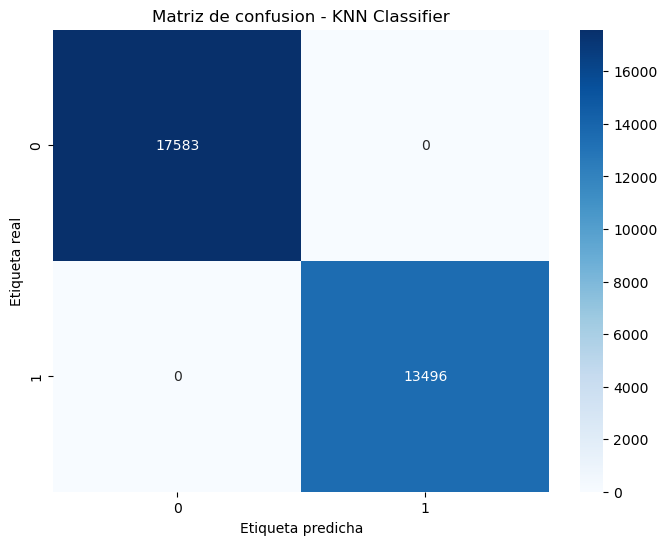

In [150]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - KNN Classifier")

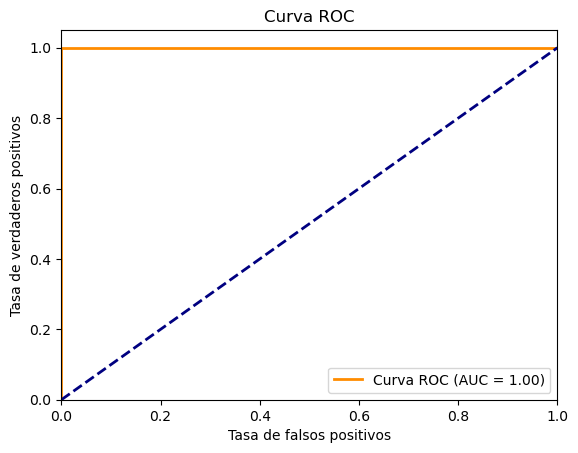

In [151]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

En comparacion a la regresion logistica, el KNN muestra un resultado un poco mas aceptable, sin embargo igual se observa sobreajuste.

### **Modelo decission tree classifier**

In [152]:
# pipeline 
model_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', DecisionTreeClassifier(
    random_state=42, 
    max_depth=5,  
    min_samples_split=10,  
    min_samples_leaf=5  
))])

In [153]:
# ajustar a los datos de entrenamiento
model_tree.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Onli...
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

In [154]:
# realizar predicciones
y_pred = model_tree.predict(x_test)

In [155]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 1.0
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17583
           1       1.00      1.00      1.00     13496

    accuracy                           1.00     31079
   macro avg       1.00      1.00      1.00     31079
weighted avg       1.00      1.00      1.00     31079



In [156]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[17583     0]
 [    0 13496]]


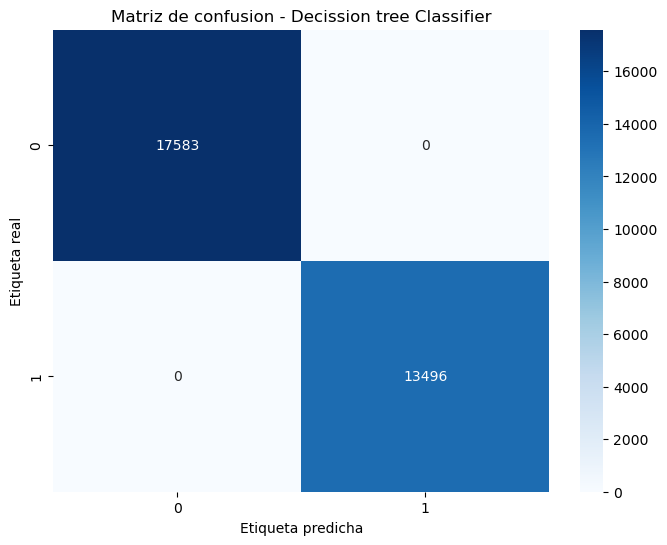

In [157]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission tree Classifier")

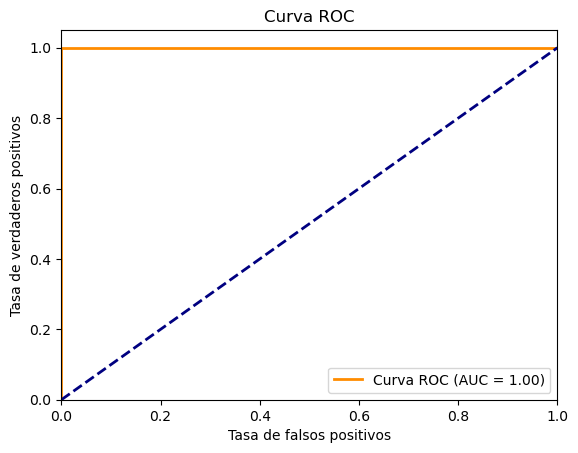

In [158]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Tambien se observa el sobreajuste de los datos.